In [2]:
import pandas as pd
import os, shutil
import time
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Nadam, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras import losses

# Define constants
img_size = 64
BATCH_SIZE = 64
NUM_CLASSES = 200
EPOCHS = 10 # Increase the number of epochs for better convergence

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'tiny-imagenet-200/train',
    target_size=(img_size, img_size),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

validation_generator = val_datagen.flow_from_directory(
    'tiny-imagenet-200/val',
    target_size=(img_size, img_size),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 100001 images belonging to 200 classes.
Found 9950 images belonging to 200 classes.


In [3]:
# Define the CNN architecture
M2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

Epoch 1/15
1563/1563 [==============================] - 487s 311ms/step - loss: 5.0133 - accuracy: 0.0520 - val_loss: 4.9998 - val_accuracy: 0.0582
Epoch 2/15
1563/1563 [==============================] - 483s 309ms/step - loss: 4.5114 - accuracy: 0.1043 - val_loss: 4.8829 - val_accuracy: 0.0753
Epoch 3/15
1563/1563 [==============================] - 487s 312ms/step - loss: 4.3057 - accuracy: 0.1291 - val_loss: 4.8078 - val_accuracy: 0.0846
Epoch 4/15
1563/1563 [==============================] - 486s 311ms/step - loss: 4.1771 - accuracy: 0.1467 - val_loss: 4.7778 - val_accuracy: 0.0962
Epoch 5/15
1563/1563 [==============================] - 480s 307ms/step - loss: 4.0897 - accuracy: 0.1576 - val_loss: 4.7360 - val_accuracy: 0.1076
Epoch 6/15
1563/1563 [==============================] - 483s 309ms/step - loss: 4.0176 - accuracy: 0.1677 - val_loss: 4.7191 - val_accuracy: 0.1060
Epoch 7/15
1563/1563 [==============================] - 470s 300ms/step - loss: 3.9585 - accuracy: 0.1774 - val_

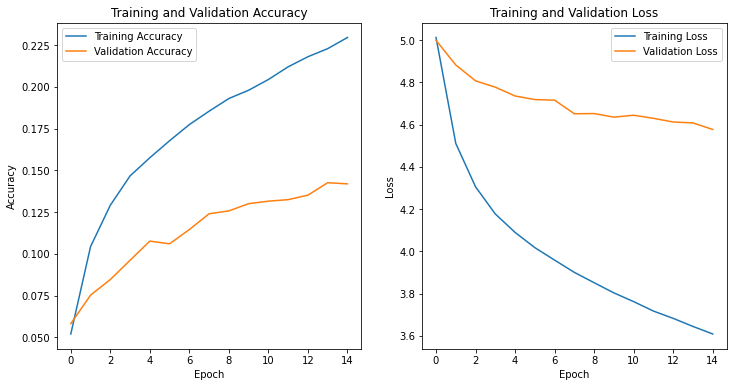

In [5]:
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
        
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()
        
    def on_epoch_end(self, batch, logs={}):
        epoch_time_end = time.time()
        self.times.append(epoch_time_end - self.epoch_time_start)


# Compile the model with an optimizer, a loss function, and evaluation metrics
M2.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data and validate it on the validation data
with tf.device('/device:GPU:0'):
    history = M2.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=15,)
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()